In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegressionCV

In [46]:
from featureExtractor import featureExtractor
from data_preprocess import nan_handler, scaler_imputer
from augmentation_datasplit import augmentation_datasplit
from metrics import acc_calc
from plotter import corr_heatmap, scatter_plot, roc_plot

In [47]:
real_feat_vects_train = featureExtractor('dataset/real_files_training')
real_df_train = pd.DataFrame(real_feat_vects_train)

fake_feat_vects_train = featureExtractor('dataset/fake_files_training')
fake_df_train = pd.DataFrame(fake_feat_vects_train)

real_feat_vects_test = featureExtractor('dataset/real_files_test')
real_df_test = pd.DataFrame(real_feat_vects_test)

fake_feat_vects_test = featureExtractor('dataset/fake_files_test')
fake_df_test = pd.DataFrame(fake_feat_vects_test)

In [48]:
X_train = pd.concat([real_df_train, fake_df_train], axis = 0)
X_test = pd.concat([real_df_test, fake_df_test], axis = 0)

y_train = pd.read_csv('dataset/y_train.csv', header=None)
y_test = pd.read_csv('dataset/y_test.csv', header=None)

y_train.drop([0], axis=0, inplace=True)
y_test.drop([0], axis=0, inplace=True)

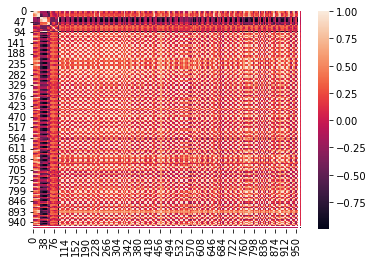

In [49]:
corr_heatmap(X_train)

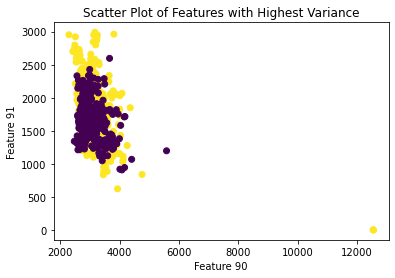

In [50]:
scatter_plot(X_train, y_train)

In [51]:
nan_handler(X_train, y_train)
X_train_preprocess, X_test_preprocess = scaler_imputer(X_train, X_test)
print(X_train_preprocess.shape)
print(X_test_preprocess.shape)

(760, 964)
(210, 964)


In [52]:
X_train1, X_validate, y_train1, y_validate, y_train1_ravel, y_validate_ravel, y_test_ravel, X_test_pca = augmentation_datasplit(X_train_preprocess, X_test_preprocess, y_train, y_test)

cf = LogisticRegressionCV()
cf.fit(X_train1, y_train1)
valid_pred = cf.predict_proba(X_validate)
test_pred = cf.predict_proba(X_test_pca)

Validation Accuracy: 0.99


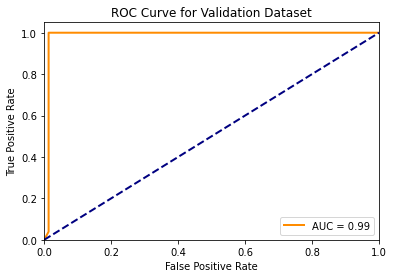

In [53]:
y_validate1 = y_validate.astype(int)
final_valid_pred = valid_pred[:,1]

fpr_valid, tpr_valid, val_accuracy = acc_calc(y_validate1, final_valid_pred)
print("Validation Accuracy:", round(val_accuracy,2))

roc_plot(fpr_valid, tpr_valid, val_accuracy)

Test Accuracy: 0.97


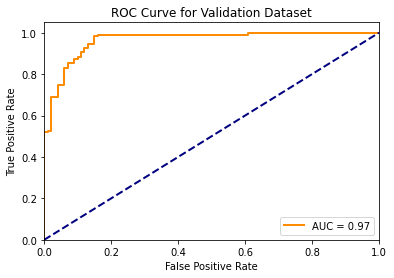

In [54]:
y_test_ravel1 = y_test_ravel.astype(int)
final_test_pred = test_pred[:,1]

fpr_test, tpr_test, test_accuracy = acc_calc(y_test_ravel1, final_test_pred)
print("Test Accuracy:", round(test_accuracy,2))

roc_plot(fpr_test, tpr_test, test_accuracy)